In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from model import *
import extractor
class Extractor(extractor.AudioDataExtractionPipeline):
    pass

In [3]:
import pandas as pd
df = pd.read_csv("dataset/Data/features_30_sec.csv")
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [4]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['label'])  # Features: e.g., 'track' and 'statistics'
y = df['label']  # Target: 'label'

# Split the dataset while preserving class proportions
X_train, X_eval, y_train, y_eval = train_test_split(
    X, y, 
    test_size=0.3,  # 30% for testing
    stratify=y,     # Preserve class proportions
    random_state=42 # For reproducibility
)

In [5]:
# Drop corrupted sample 
idx = X_train.index[X_train["filename"] == "jazz.00054.wav"]
X_train = X_train.drop(index=idx)
y_train = y_train.drop(index=idx)

In [6]:
model, acc = train_and_evaluate_catboost(
    X_eval.index.to_numpy(), 
    X_train.drop(columns=["filename", "length"]).to_numpy(), 
    X_eval.drop(columns=["filename", "length"]).to_numpy(), 
    y_train.to_numpy(), 
    y_eval.to_numpy()
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3648069	test: 0.3433333	best: 0.3433333 (0)	total: 61.2ms	remaining: 30.5s
50:	learn: 0.7367668	test: 0.6566667	best: 0.6700000 (47)	total: 182ms	remaining: 1.6s
100:	learn: 0.8211731	test: 0.7200000	best: 0.7233333 (98)	total: 298ms	remaining: 1.18s
150:	learn: 0.8726753	test: 0.7300000	best: 0.7400000 (122)	total: 414ms	remaining: 957ms
200:	learn: 0.9070100	test: 0.7366667	best: 0.7466667 (182)	total: 530ms	remaining: 788ms
250:	learn: 0.9313305	test: 0.7366667	best: 0.7533333 (218)	total: 645ms	remaining: 639ms
300:	learn: 0.9484979	test: 0.7533333	best: 0.7533333 (218)	total: 762ms	remaining: 504ms
350:	learn: 0.9670959	test: 0.7466667	best: 0.7600000 (318)	total: 876ms	remaining: 372ms
400:	learn: 0.9728183	test: 0.7466667	best: 0.7600000 (318)	total: 1000ms	remaining: 247ms
450:	learn: 0.9756795	test: 0.7400000	best: 0.7600000 (318)	total: 1.12s	remaining: 122ms
499:	learn: 0.9842632	test: 0.7466667	best: 0.7600000 (318)	total: 1.24s	remaining: 0us

bestTest = 0.76
b

In [7]:
import soundfile as sf
import librosa
import numpy as np
from resampy import resample

In [8]:
E_train = Extractor(
    idx=[np.array([row[0]]) for row in X_train.iterrows()],
    x=[row[1].to_numpy() for row in X_train.iterrows()],
    y=[np.array([row]) for row in y_train],
    train=True
)
E_eval = Extractor(
    idx=[np.array([row[0]]) for row in X_eval.iterrows()],
    x=[row[1].to_numpy() for row in X_eval.iterrows()],
    y=[np.array([row]) for row in y_eval],
    train=False
)

def load_audio(x) -> [np.ndarray]:
    file_path = f"dataset/Data/genres_original/{x[0].split('.')[0]}/{x[0]}"
    y, sr = sf.read(file_path)
    if len(y.shape) == 2:  # Convert stereo to mono
        y = np.mean(y, dim=0)
    y = resample(y, sr, 16000)
    return y
Extractor.register_extractor('audio', load_audio)
E_train.full_extract()
E_eval.full_extract()

audio:   0%|          | 0/699 [00:00<?, ?it/s]

audio:   0%|          | 0/300 [00:00<?, ?it/s]

In [10]:
Extractor.register_extractor('stats', lambda x: x[2:])
Extractor.register_extractor('rms', lambda audio: np.sqrt(np.mean(audio**2)))
E_train.soft_extract()
E_eval.soft_extract()

rms:   0%|          | 0/699 [00:00<?, ?it/s]

stats:   0%|          | 0/300 [00:00<?, ?it/s]

rms:   0%|          | 0/300 [00:00<?, ?it/s]

In [11]:
from librosa.sequence import viterbi

import numpy as np

def viterbi_dp(emission_probs, transition_matrix, p_init=None, eps=1e-15):
    """
    A custom Viterbi implementation that outputs:
      1) The DP table (log-domain) of best-path log-probs to each state/frame
      2) The state backpointer table
      3) A probability distribution over states at each time,
         obtained by exponentiating and normalizing the DP table
      4) The best-path state sequence from backtracking

    Parameters
    ----------
    emission_probs : np.ndarray [shape=(n_states, n_frames)]
        Probability (linear scale) of emitting each state at each frame.
        We will take the log of these values for the DP.
    transition_matrix : np.ndarray [shape=(n_states, n_states)]
        Probability (linear scale) of transitioning from state i to state j.
    p_init : np.ndarray [shape=(n_states,)]
        Initial state distribution (linear probabilities).
        If None, defaults to uniform.
    eps : float
        Small constant to avoid log(0).

    Returns
    -------
    dp : np.ndarray [shape=(n_states, n_frames)]
        dp[s, t] = log-prob of the best path that ends in state s at time t
    backpointer : np.ndarray [shape=(n_states, n_frames)]
        backpointer[s, t] = index of the best predecessor state for s at t
    state_probs : np.ndarray [shape=(n_states, n_frames)]
        Probability distribution over states for each frame
        (obtained via time-wise softmax of dp).
    best_path : np.ndarray [shape=(n_frames,)]
        The single best state for each frame (by Viterbi backtracking).
    """

    n_states, n_frames = emission_probs.shape

    if p_init is None:
        p_init = np.ones(n_states) / n_states

    # Convert input probabilities to log
    log_emit = np.log(emission_probs + eps)
    log_trans = np.log(transition_matrix + eps)
    log_init = np.log(p_init + eps)

    # Create storage
    dp = np.zeros((n_states, n_frames), dtype=np.float64)  # log of best path so far
    backpointer = np.zeros((n_states, n_frames), dtype=np.int32)

    # Initialization: time t=0
    dp[:, 0] = log_init + log_emit[:, 0]
    backpointer[:, 0] = 0  # no predecessor for the first frame

    # Forward pass
    for t in range(1, n_frames):
        for s in range(n_states):
            # Possible log-probs if we end in state s at time t
            candidates = dp[:, t-1] + log_trans[:, s]
            best_prev = np.argmax(candidates)
            dp[s, t] = candidates[best_prev] + log_emit[s, t]
            backpointer[s, t] = best_prev

    # Backtrack to find best path
    best_path = np.zeros(n_frames, dtype=np.int32)
    best_path[-1] = np.argmax(dp[:, -1])
    for t in range(n_frames - 2, -1, -1):
        best_path[t] = backpointer[best_path[t+1], t+1]

    # Convert dp to a per-frame probability distribution by exponentiating
    # and normalizing along the 'state' axis
    state_probs = np.zeros_like(dp, dtype=np.float64)
    for t in range(n_frames):
        # shift by max log-prob to avoid underflow
        row = dp[:, t]
        row_max = np.max(row)
        exp_row = np.exp(row - row_max)
        state_probs[:, t] = exp_row / np.sum(exp_row)

    return dp, backpointer, state_probs, best_path


def estimate_cqt_bin_viterbi(
    y,
    sr=22050,
    hop_length=512,
    n_bins=50,
    fmin=librosa.note_to_hz('C2'),
    silence_threshold=0.01,  # total energy below which we strongly favor silence
    stay_probability=0.9
):
    """
    Estimate the most likely CQT-bin sequence from an audio file, plus a
    special silence state. Use librosa's built-in Viterbi for smoothing.

    Parameters
    ----------
    audio_path : str
        Path to the audio file.
    sr : int
        Sample rate for loading the audio.
    hop_length : int
        Hop length for the CQT.
    n_bins : int
        Number of frequency bins in the CQT.
    fmin : float
        Minimum frequency for the CQT.
    silence_threshold : float
        Frames whose total energy is below this threshold are dominated by the silence state.
    stay_probability : float
        Probability of staying in the same state (bin or silence). The remainder
        is distributed across transitioning to all other states.

    Returns
    -------
    state_sequence : np.ndarray [shape=(n_frames,)]
        The best path of states (CQT bin indices plus one extra index for silence).
        Indices 0..(n_bins-1) correspond to actual bins; index n_bins is silence.
    path_log_probs : np.ndarray [shape=(n_frames,)]
        The log-probability of the best path up to (and including) each frame.
    emission_probs : np.ndarray [shape=(n_bins+1, n_frames)]
        The per-frame emission probability of each bin and the silence state.

    Notes
    -----
    - By default, `librosa.sequence.viterbi` expects probabilities in linear domain
      (non-log). We will manually compute the log-likelihood of the best path after
      we get the final state sequence.
    - The silence state (index = n_bins) has no direct column in the input,
      but we infer its emission probability by checking the total frame energy.
    """

    ################################################################
    # 1. Load audio and compute CQT magnitudes
    ################################################################
    cqt = librosa.cqt(y, sr=sr, hop_length=hop_length, n_bins=n_bins, fmin=fmin)
    cqt_mag = np.abs(cqt)  # shape = (n_bins, n_frames)
    n_frames = cqt_mag.shape[1]

    ################################################################
    # 2. Build emission probability matrix (n_bins + 1 states)
    #    - last row is "silence"
    ################################################################
    n_states = n_bins + 1
    silence_idx = n_bins

    emission_probs = np.zeros((n_states, n_frames), dtype=np.float32)

    for t in range(n_frames):
        frame_energy = np.sum(cqt_mag[:, t])

        if frame_energy < silence_threshold:
            # If total energy is below threshold, strongly favor silence
            # and place a minimal probability on actual bins
            emission_probs[:n_bins, t] = 1e-10  # negligible
            emission_probs[silence_idx, t] = 1.0
        else:
            # Distribute across the bins proportionally, plus a small portion for silence
            emission_probs[:n_bins, t] = cqt_mag[:, t]

            # Example: give silence a small probability if frame is not silent
            # You can tune this constant or use a ratio
            emission_probs[silence_idx, t] = 1e-6

            # Normalize so sum of states = 1
            col_sum = np.sum(emission_probs[:, t])
            if col_sum > 0:
                emission_probs[:, t] /= col_sum
            else:
                # fallback if no energy
                emission_probs[silence_idx, t] = 1.0

    ################################################################
    # 3. Define a transition matrix for n_states = n_bins + 1
    #    We'll have:
    #      - High probability stay_probability to remain in the same state
    #      - The remainder distributed equally among all other states
    ################################################################
    transition_matrix = np.zeros((n_states, n_states), dtype=np.float32)
    # For each of the bin states
    for i in range(n_bins):
        transition_matrix[i, i] = stay_probability
        # The fraction to distribute among other states
        remain = (1.0 - stay_probability)
        # We'll give an equal fraction to the other n_states - 1
        transition_matrix[i, :] += remain / (n_states - 1)
        # But this double-counted staying in the same state; revert it to the intended stay_probability
        transition_matrix[i, i] = stay_probability

    # For the silence state
    transition_matrix[silence_idx, silence_idx] = stay_probability
    remain_sil = (1.0 - stay_probability)
    transition_matrix[silence_idx, :] += remain_sil / (n_states - 1)
    # revert the diagonal to stay_probability
    transition_matrix[silence_idx, silence_idx] = stay_probability

    # Normalize each row (should already be ~1.0, but let's be safe)
    for i in range(n_states):
        row_sum = np.sum(transition_matrix[i, :])
        if row_sum > 0:
            transition_matrix[i, :] /= row_sum

    ################################################################
    # 4. Run Viterbi via librosa
    ################################################################
    # librosa.sequence.viterbi expects:
    #    prob: shape=(n_states, n_steps) - each column is a probability distribution
    #    transition: shape=(n_states, n_states)
    # We can optionally specify p_init for initial distribution, e.g. uniform
    p_init = np.ones(n_states, dtype=np.float32) / n_states
    
    return viterbi_dp(emission_probs, transition_matrix, p_init=p_init)[2]


In [12]:
import librosa
import soundfile as sf
from resampy import resample
from tqdm.notebook import tqdm

def compute_cepstrum(audio, sr, n_fft=2048, hop_length=512):
    """
    Compute the cepstrum of an audio signal.

    Parameters:
    - audio (numpy array): The audio signal.
    - sr (int): Sampling rate of the audio signal.
    - n_fft (int): Number of FFT components. Default is 2048.
    - hop_length (int): Number of samples between successive frames. Default is 512.

    Returns:
    - cepstrum (numpy array): The computed cepstrum.
    """
    # Compute the magnitude spectrogram
    spectrogram = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))

    # Convert to log scale
    log_spectrogram = np.log1p(spectrogram)

    # Compute the inverse FFT of the log-spectrogram
    cepstrum = np.fft.ifft(log_spectrogram, axis=0).real

    return cepstrum


def compute_cepstrum_over_cqt(y, sr=22050, hop_length=512, bins_per_octave=12, n_bins=84):
    """
    Compute the cepstrum over the CQT of an audio signal.

    Parameters:
        audio_path (str): Path to the audio file.
        sr (int): Sampling rate for the audio.
        hop_length (int): Hop length for the CQT computation.
        bins_per_octave (int): Number of bins per octave for CQT.
        n_bins (int): Number of total bins for CQT.

    Returns:
        cqt_cepstrum (np.ndarray): Cepstrum computed from the CQT.
    """
    # Compute the CQT of the signal
    cqt = librosa.cqt(y, sr=sr, hop_length=hop_length, bins_per_octave=bins_per_octave, n_bins=n_bins)

    # Compute the magnitude spectrum of the CQT
    magnitude = np.abs(cqt)

    # Compute the log of the magnitude
    log_magnitude = np.log1p(magnitude)  # log1p for numerical stability

    # Compute the cepstrum by applying IFFT to the log-magnitude spectrum
    cqt_cepstrum = np.fft.irfft(log_magnitude, axis=0)

    return cqt_cepstrum

sr = 16000
n_mfcc = 13
n_mels = 128

def mel(audio):
    # Calculate MelSpectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Convert to decibel scale
    return mel_spectrogram

Extractor.register_extractor('mel', mel)
# Extractor.register_extractor('cepstrum', lambda audio: compute_cepstrum(audio, sr=sr))
# Extractor.register_extractor('chroma_cqt', lambda audio: librosa.feature.chroma_cqt(y=audio, sr=sr))
# Extractor.register_extractor('ccqt', lambda audio: compute_cepstrum_over_cqt(y=audio, sr=sr))
# Extractor.register_extractor('cqr_viterbi', lambda audio: estimate_cqt_bin_viterbi(y=audio, sr=sr))
Extractor.register_extractor('cqt', lambda audio: np.abs(librosa.cqt(audio, sr=sr, hop_length=512, bins_per_octave=12, n_bins=84)))
# Extractor.register_extractor('stft', lambda audio: librosa.stft(audio, hop_length=512))
# Extractor.register_extractor('mfcc', lambda audio: librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc))


In [13]:
E_train.soft_extract()
E_eval.soft_extract()

mel:   0%|          | 0/699 [00:00<?, ?it/s]

cqt:   0%|          | 0/699 [00:00<?, ?it/s]

mel:   0%|          | 0/300 [00:00<?, ?it/s]

cqt:   0%|          | 0/300 [00:00<?, ?it/s]

In [14]:
import matplotlib.pyplot as plt

In [15]:
hop_length=512
Extractor.register_extractor('bpm_beat', lambda audio: librosa.beat.beat_track(y=audio, sr=sr, hop_length=hop_length))
Extractor.register_extractor('bpm', lambda bpm_beat: bpm_beat[0])
Extractor.register_extractor('beat', lambda bpm_beat: bpm_beat[1])

In [16]:
E_train.soft_extract()
E_eval.soft_extract()

bpm_beat:   0%|          | 0/699 [00:00<?, ?it/s]

bpm:   0%|          | 0/699 [00:00<?, ?it/s]

beat:   0%|          | 0/699 [00:00<?, ?it/s]

bpm_beat:   0%|          | 0/300 [00:00<?, ?it/s]

bpm:   0%|          | 0/300 [00:00<?, ?it/s]

beat:   0%|          | 0/300 [00:00<?, ?it/s]

In [17]:
Extractor.register_extractor('cqt_hpss', lambda cqt: librosa.decompose.hpss(cqt))
Extractor.register_extractor('harmonic', lambda cqt_hpss: cqt_hpss[0])
Extractor.register_extractor('percussive', lambda cqt_hpss: cqt_hpss[1])

In [18]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_hpss:   0%|          | 0/699 [00:00<?, ?it/s]

harmonic:   0%|          | 0/699 [00:00<?, ?it/s]

percussive:   0%|          | 0/699 [00:00<?, ?it/s]

cqt_hpss:   0%|          | 0/300 [00:00<?, ?it/s]

harmonic:   0%|          | 0/300 [00:00<?, ?it/s]

percussive:   0%|          | 0/300 [00:00<?, ?it/s]

(0.0, 30.0)

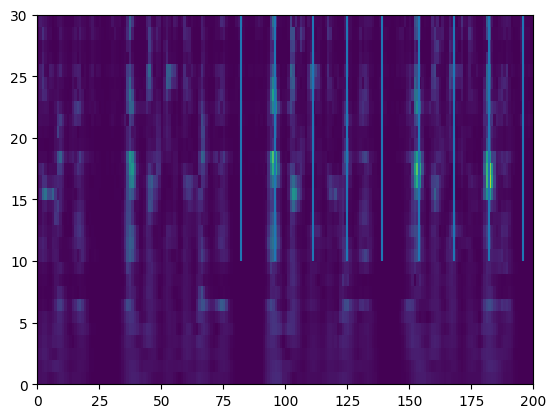

In [19]:
plt.pcolor(E_train.features['percussive'][0])
plt.vlines(E_train.features['beat'][0], 10, 30)
plt.xlim(0, 200)
plt.ylim(0, 30)

ChatGPT query

Write a python function with a following signature

```
rnd = np.random.default_rng(42)
def crop_by_beats(beat, harmony_specs, percussion_specs, frames_per_beat = 4, number_of_beats=16, number_of_samples=8)
    pass
```

beats is the integer array of frames at which there was a beat
upsample beats , for two neighboring values insert frames_per_beat-1 values between them uniformly cropped to the nearest frame

Next number_of_samples times sample starting position in the upsampled beats array and take number_of_beats * frames_per_beat consequent beats. Position must be sampled aligned to number_of_beats * frames_per_beat.

harmony_specs is a list of several spectrograms with harmonic parts of melody.
for each of harmony spec calculate the mean along time axis (axis = 1) between the consequent beats of the sample including the frames at which there was a beat

percussion_specs is a list of several spectrograms with percussion parts of melody. For each of percussion spec calculate the downsampled spectrogram as with harmony specs but shift the spectrogram so that the first sample was centered at the beat. The resulting length must be the same

return list of tuples containing downsampled spectrograms

In [20]:
rnd = np.random.default_rng(42)

def crop_by_beats(
    beat,
    harmony_specs,
    percussion_specs,
    frames_per_beat=4,
    number_of_beats=16,
    number_of_samples=8
):
    """
    Upsample the array of integer beat positions and then randomly extract 
    (number_of_samples) chunks of length (number_of_beats * frames_per_beat).
    
    For each chunk, compute the downsampled spectrogram:
      - For harmonic specs: take the mean along the time axis (axis=1) 
        between consecutive upsampled-beat boundaries.
      - For percussion specs: take the mean along the time axis over intervals 
        shifted so that each is centered at the corresponding upsampled beat.
    
    Parameters
    ----------
    beat : 1D array-like of int
        Array of frame indices at which a beat occurs. Must be strictly increasing.
    harmony_specs : list of np.ndarray
        Each element is a spectrogram for a harmonic component with shape 
        (freq_bins, time_frames).
    percussion_specs : list of np.ndarray
        Each element is a spectrogram for a percussion component with shape 
        (freq_bins, time_frames).
    frames_per_beat : int
        Number of subdivisions per original beat when upsampling.
    number_of_beats : int
        How many beats (in terms of upsampled subdivisions) to include in each chunk.
    number_of_samples : int
        How many random chunks to extract.
    
    Returns
    -------
    list of tuples
        A list (of length `number_of_samples`). Each element is:
        
            (harmony_downsampled_list, percussion_downsampled_list)
        
        where `harmony_downsampled_list` and `percussion_downsampled_list` are each 
        lists of spectrograms (in the same order as `harmony_specs` and 
        `percussion_specs`). Each downsampled spectrogram has shape:
        
            (freq_bins, number_of_beats * frames_per_beat)
    """
    
    # 1) Upsample 'beat' by inserting (frames_per_beat - 1) points 
    #    uniformly between each pair of consecutive beats.
    up_beats = []
    beat = np.array(beat, dtype=int)
    for i in range(len(beat) - 1):
        start = beat[i]
        end = beat[i + 1]
        diff = end - start
        
        # Insert frames_per_beat subdivisions between start and end, 
        # snapping to the nearest integer frame.
        for k in range(frames_per_beat):
            val = start + round(k * diff / frames_per_beat)
            # Avoid duplicates if rounding yields same as last appended
            if not up_beats or val != up_beats[-1]:
                up_beats.append(val)
    
    up_beats = np.array(up_beats, dtype=int)
    
    # 2) We need (number_of_beats * frames_per_beat + 1) upsampled-beat 
    #    positions for each chunk (the +1 is because we need the right boundary).
    needed_length = number_of_beats * frames_per_beat + 1
    total_upsampled = len(up_beats)
    
    # If we cannot extract even one chunk, return empty
    max_start = total_upsampled - needed_length
    if max_start < 0:
        return []
    
    # Possible start indices must be multiples of (number_of_beats * frames_per_beat)
    # so that each chunk is "aligned".
    stride = number_of_beats * frames_per_beat
    possible_starts = np.arange(0, max_start + 1, stride)
    
    # Randomly choose 'number_of_samples' start indices from these possibilities
    chosen_starts = rnd.choice(possible_starts, size=number_of_samples, replace=True)
    
    results = []
    for start_idx in chosen_starts:
        # Boundaries for this sample
        boundary_points = up_beats[start_idx : start_idx + needed_length]
        # === 3) Downsample each harmony spec ===
        harmony_downsampled = []
        for spec in harmony_specs:
            # spec has shape (freq_bins, time_frames)
            freq_bins = spec.shape[0]
            
            # We'll get (number_of_beats * frames_per_beat) intervals
            ds_harm = np.zeros((freq_bins, number_of_beats * frames_per_beat),
                               dtype=spec.dtype)
            for j in range(number_of_beats * frames_per_beat):
                left = boundary_points[j]
                right = boundary_points[j + 1]
                # Take the average along axis=1 (time axis)
                ds_harm[:, j] = spec[:, left:right].mean(axis=1)

            harmony_downsampled.append(ds_harm)
        
        # === 4) Downsample each percussion spec with centering ===
        percussion_downsampled = []
        for spec in percussion_specs:
            
            freq_bins = spec.shape[0]
            ds_perc = np.zeros((freq_bins, number_of_beats * frames_per_beat),
                               dtype=spec.dtype)

            old_right = None
            for j in range(number_of_beats * frames_per_beat):
                dist = boundary_points[j + 1] - boundary_points[j]
                right = boundary_points[j + 1] - dist // 2
                if old_right is None:
                    left = boundary_points[j] - dist // 2
                else:
                    left = old_right
                old_right = right
                
                # Clamp to valid range
                if left < 0:
                    left = 0
                if right > spec.shape[1]:
                    right = spec.shape[1]

                # Average over the time axis in [left, right)
                chunk = spec[:, left:right]
                ds_perc[:, j] = chunk.mean(axis=1)
            
            percussion_downsampled.append(ds_perc)
        
        # One result entry = (list_of_downsampled_harmony_specs, list_of_downsampled_percussion_specs)
        results.append((harmony_downsampled, percussion_downsampled))
    return results

In [21]:
Extractor.register_extractor('sample', 
                             lambda beat, cqt, harmonic, percussive: 
                             crop_by_beats(
                                 beat=beat, 
                                 harmony_specs=[cqt, harmonic], 
                                 percussion_specs=[percussive]
                             ), shuffle=True, map_labels=[
                                 ('idx', 's_idx'), 
                                 ('y', 's_y'), 
                                 ('stats', 's_stats'), 
                                 ('bpm', 's_bpm')])
Extractor.register_extractor('s_cqt', lambda sample: sample[0][0])
Extractor.register_extractor('s_harmonic', lambda sample: sample[0][1])
Extractor.register_extractor('s_percussive', lambda sample: sample[1][0])


In [22]:
E_train.soft_extract()
E_eval.soft_extract()

sample:   0%|          | 0/699 [00:00<?, ?it/s]

s_cqt:   0%|          | 0/5584 [00:00<?, ?it/s]

s_harmonic:   0%|          | 0/5584 [00:00<?, ?it/s]

s_percussive:   0%|          | 0/5584 [00:00<?, ?it/s]

sample:   0%|          | 0/300 [00:00<?, ?it/s]

s_cqt:   0%|          | 0/2384 [00:00<?, ?it/s]

s_harmonic:   0%|          | 0/2384 [00:00<?, ?it/s]

s_percussive:   0%|          | 0/2384 [00:00<?, ?it/s]

In [23]:
Extractor.register_extractor('cqt_chromo_stats', 
                             lambda s_cqt: np.hstack([s_cqt.mean(axis=1), s_cqt.var(axis=1)]))
Extractor.register_extractor('harmonic_chromo_stats', 
                             lambda s_harmonic: np.hstack([s_harmonic.mean(axis=1), s_harmonic.var(axis=1)]))
Extractor.register_extractor('percussive_chromo_stats', 
                             lambda s_percussive: np.hstack([s_percussive.mean(axis=1), s_percussive.var(axis=1)]))
Extractor.register_extractor('percussive_beat_frames', 
                             lambda s_percussive: s_percussive.mean(axis=0))

In [24]:
E_train.soft_extract()
E_eval.soft_extract()

cqt_chromo_stats:   0%|          | 0/5584 [00:00<?, ?it/s]

harmonic_chromo_stats:   0%|          | 0/5584 [00:00<?, ?it/s]

percussive_chromo_stats:   0%|          | 0/5584 [00:00<?, ?it/s]

percussive_beat_frames:   0%|          | 0/5584 [00:00<?, ?it/s]

cqt_chromo_stats:   0%|          | 0/2384 [00:00<?, ?it/s]

harmonic_chromo_stats:   0%|          | 0/2384 [00:00<?, ?it/s]

percussive_chromo_stats:   0%|          | 0/2384 [00:00<?, ?it/s]

percussive_beat_frames:   0%|          | 0/2384 [00:00<?, ?it/s]